In [1]:
# Heart Disease Clustering Project using K-Means

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")


# Step 2: Load Dataset
df = pd.read_csv("heart_disease.csv")

In [2]:
# Step 3: Basic Data Info
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
m

In [3]:
# Step 4: Drop rows with missing values
df = df.dropna()

# Step 5: Select only numeric columns and drop 'id' if present
df = df.select_dtypes(include=[np.number])
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Step 6: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

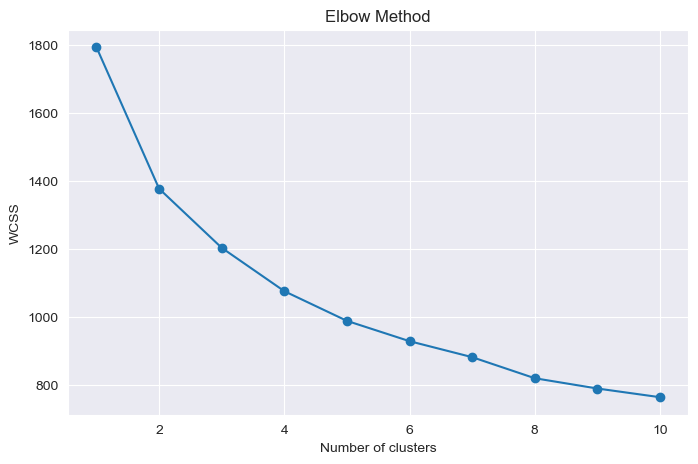

In [4]:
# Step 7: Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [5]:
# Step 8: KMeans Clustering (Assuming 3 clusters based on Elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans

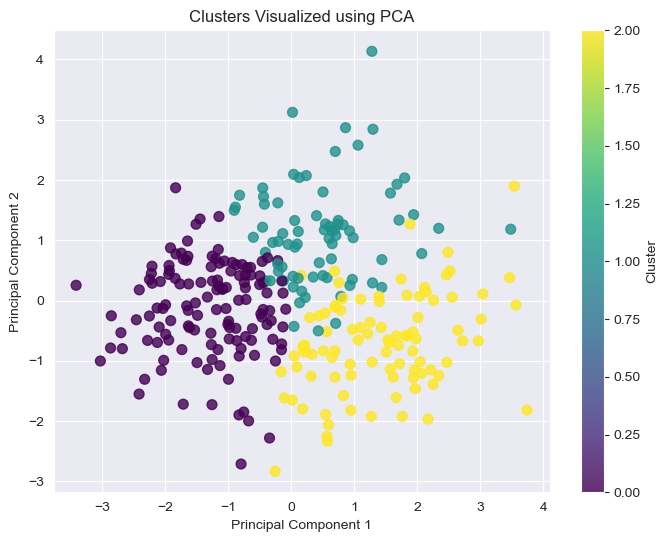

In [6]:
# Step 9: Visualize Clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters Visualized using PCA")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

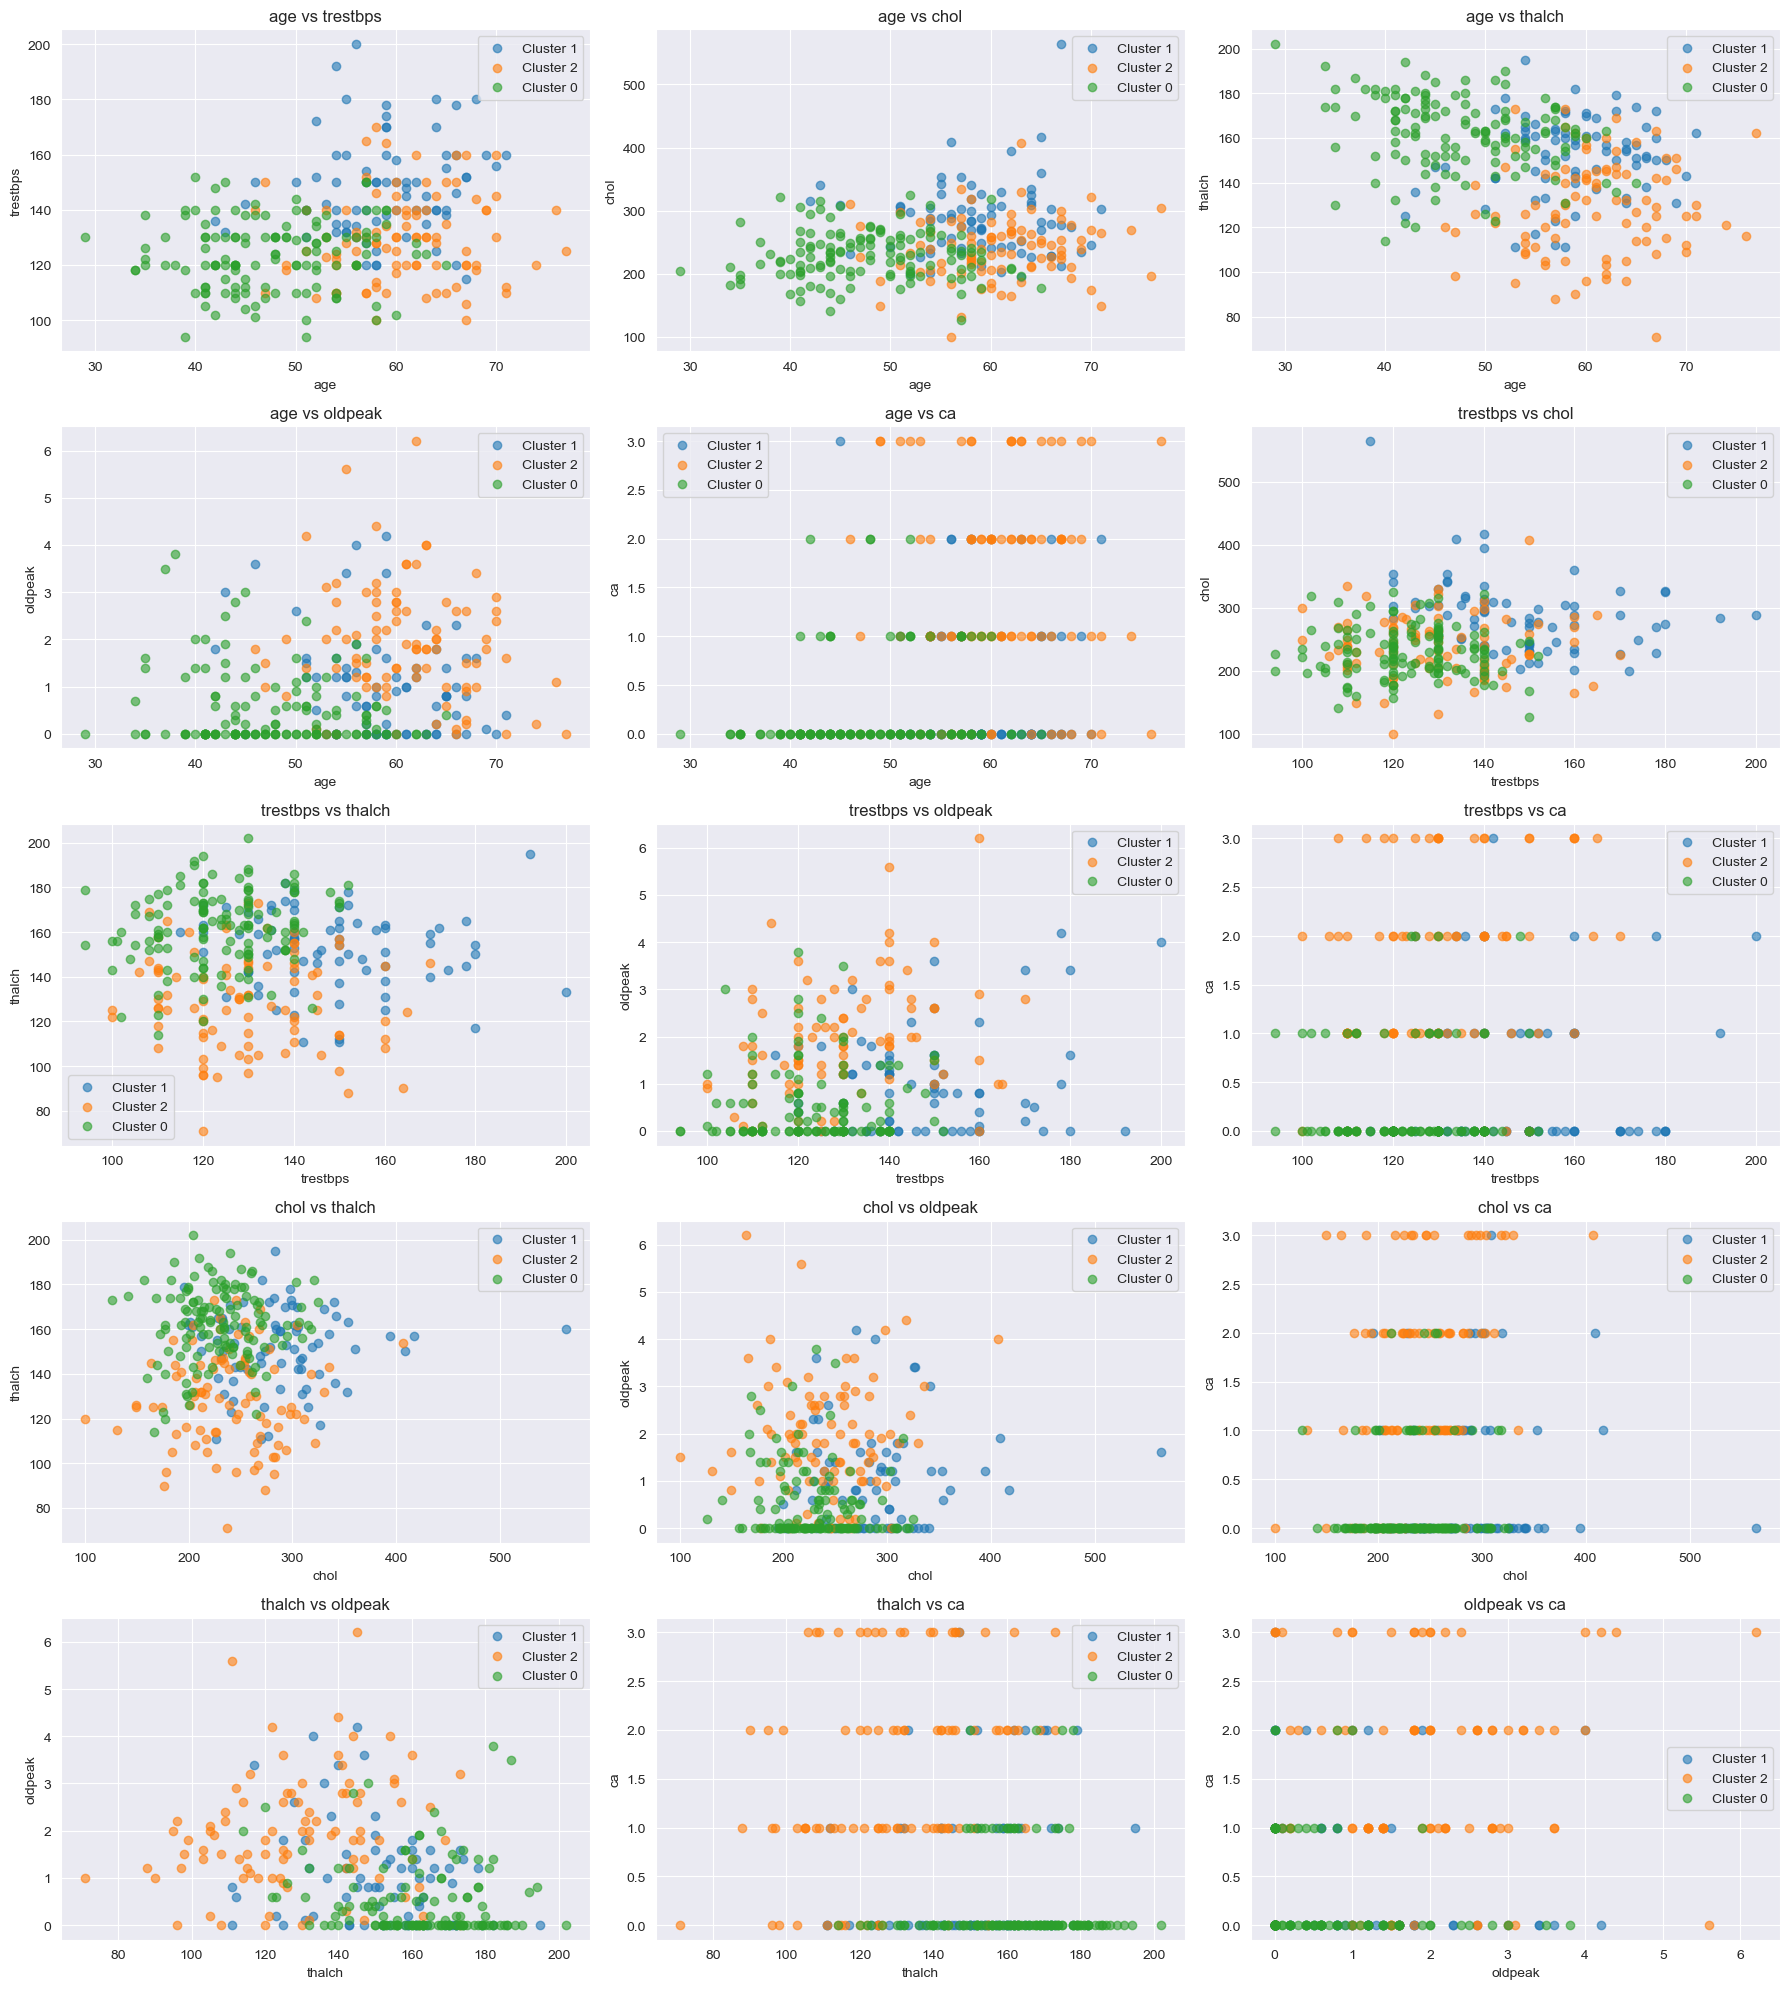

In [7]:
# Step 10: Plot Multiple 2D Cluster Graphs (Pairwise)
features = df.columns.drop('Cluster')  # Exclude 'Cluster'
pairs = list(combinations(features, 2))

rows = (len(pairs) + 2) // 3
fig, axs = plt.subplots(nrows=rows, ncols=3, figsize=(18, rows * 4))
axs = axs.ravel()

for i, (x, y) in enumerate(pairs):
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        axs[i].scatter(cluster_data[x], cluster_data[y], label=f'Cluster {cluster}', alpha=0.6)
    axs[i].set_xlabel(x)
    axs[i].set_ylabel(y)
    axs[i].set_title(f"{x} vs {y}")
    axs[i].legend()
    axs[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()